<a href="https://colab.research.google.com/github/Pragna235/Fetal-Health-Classification-ML-Project/blob/main/Fetal_Health_Classification_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fetal Health Classification Project**


### **Abstract**

Classify fetal health in order to prevent child and maternal mortality.


### **About this dataset**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for `295 000 deaths` during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths `(94%)` occurred in low-resource settings, and most `could have been prevented`.

In light of what was mentioned above,` Cardiotocograms (CTGs)` are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### **Data**


This dataset contains `2126` records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into `3 classes` :

* Normal
* Suspect
* Pathological

### **Problem Statement**

Create a multiclass model to classify CTG features into the three fetal health states.

### **Table of Contents**

* Importing Libraries
* Loading Dataset
* Exploratory Data Analysis
* Data Processing
* Model Evalution
* Conclusion



--------



### **Importing Libraries**

In [1]:
!pip install decision-tree-id3

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for decision-tree-id3: filename=decision_tree_id3-0.1.2-py3-none-any.whl size=15939 sha256=60a8da4a0e1abfc96239a6aad4880d917db886fb8fa88484f0c1aa796cd7a060
  Stored in directory: /root/.cache/pip/wheels/b5/48/52/e8ac7a547a6343fce8e441f4db4a9052c7a8547fd91f413363
Successfully built decision-tree-id3


In [2]:
# Load libraries

import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import six
import sys

sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from sklearn.tree import DecisionTreeClassifier,export_text

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions



---



### **Loading Dataset**

In [3]:
data = pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# Print the shape of tha dataset
data.shape

(2126, 22)

In [5]:
# Check if there are duplicates
data.duplicated().sum()

13

In [6]:
data[data.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [7]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)

In [8]:
# Print first 5 rows after removing the duplicates
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [9]:
# Print the shape after removing the duplicates
data.shape

(2113, 22)

In [10]:
# Description Transpose of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [11]:
# Get the value counts of the fetal_health output atttribute
print(data.groupby('fetal_health').size())
# data['fetal_health'].value_counts

fetal_health
1.0    1646
2.0     292
3.0     175
dtype: int64


In [12]:
# Get the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
# Check for missing values
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [14]:
# Total number of columns in the dataset
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')



---



### **Exploratory Data Analysis**

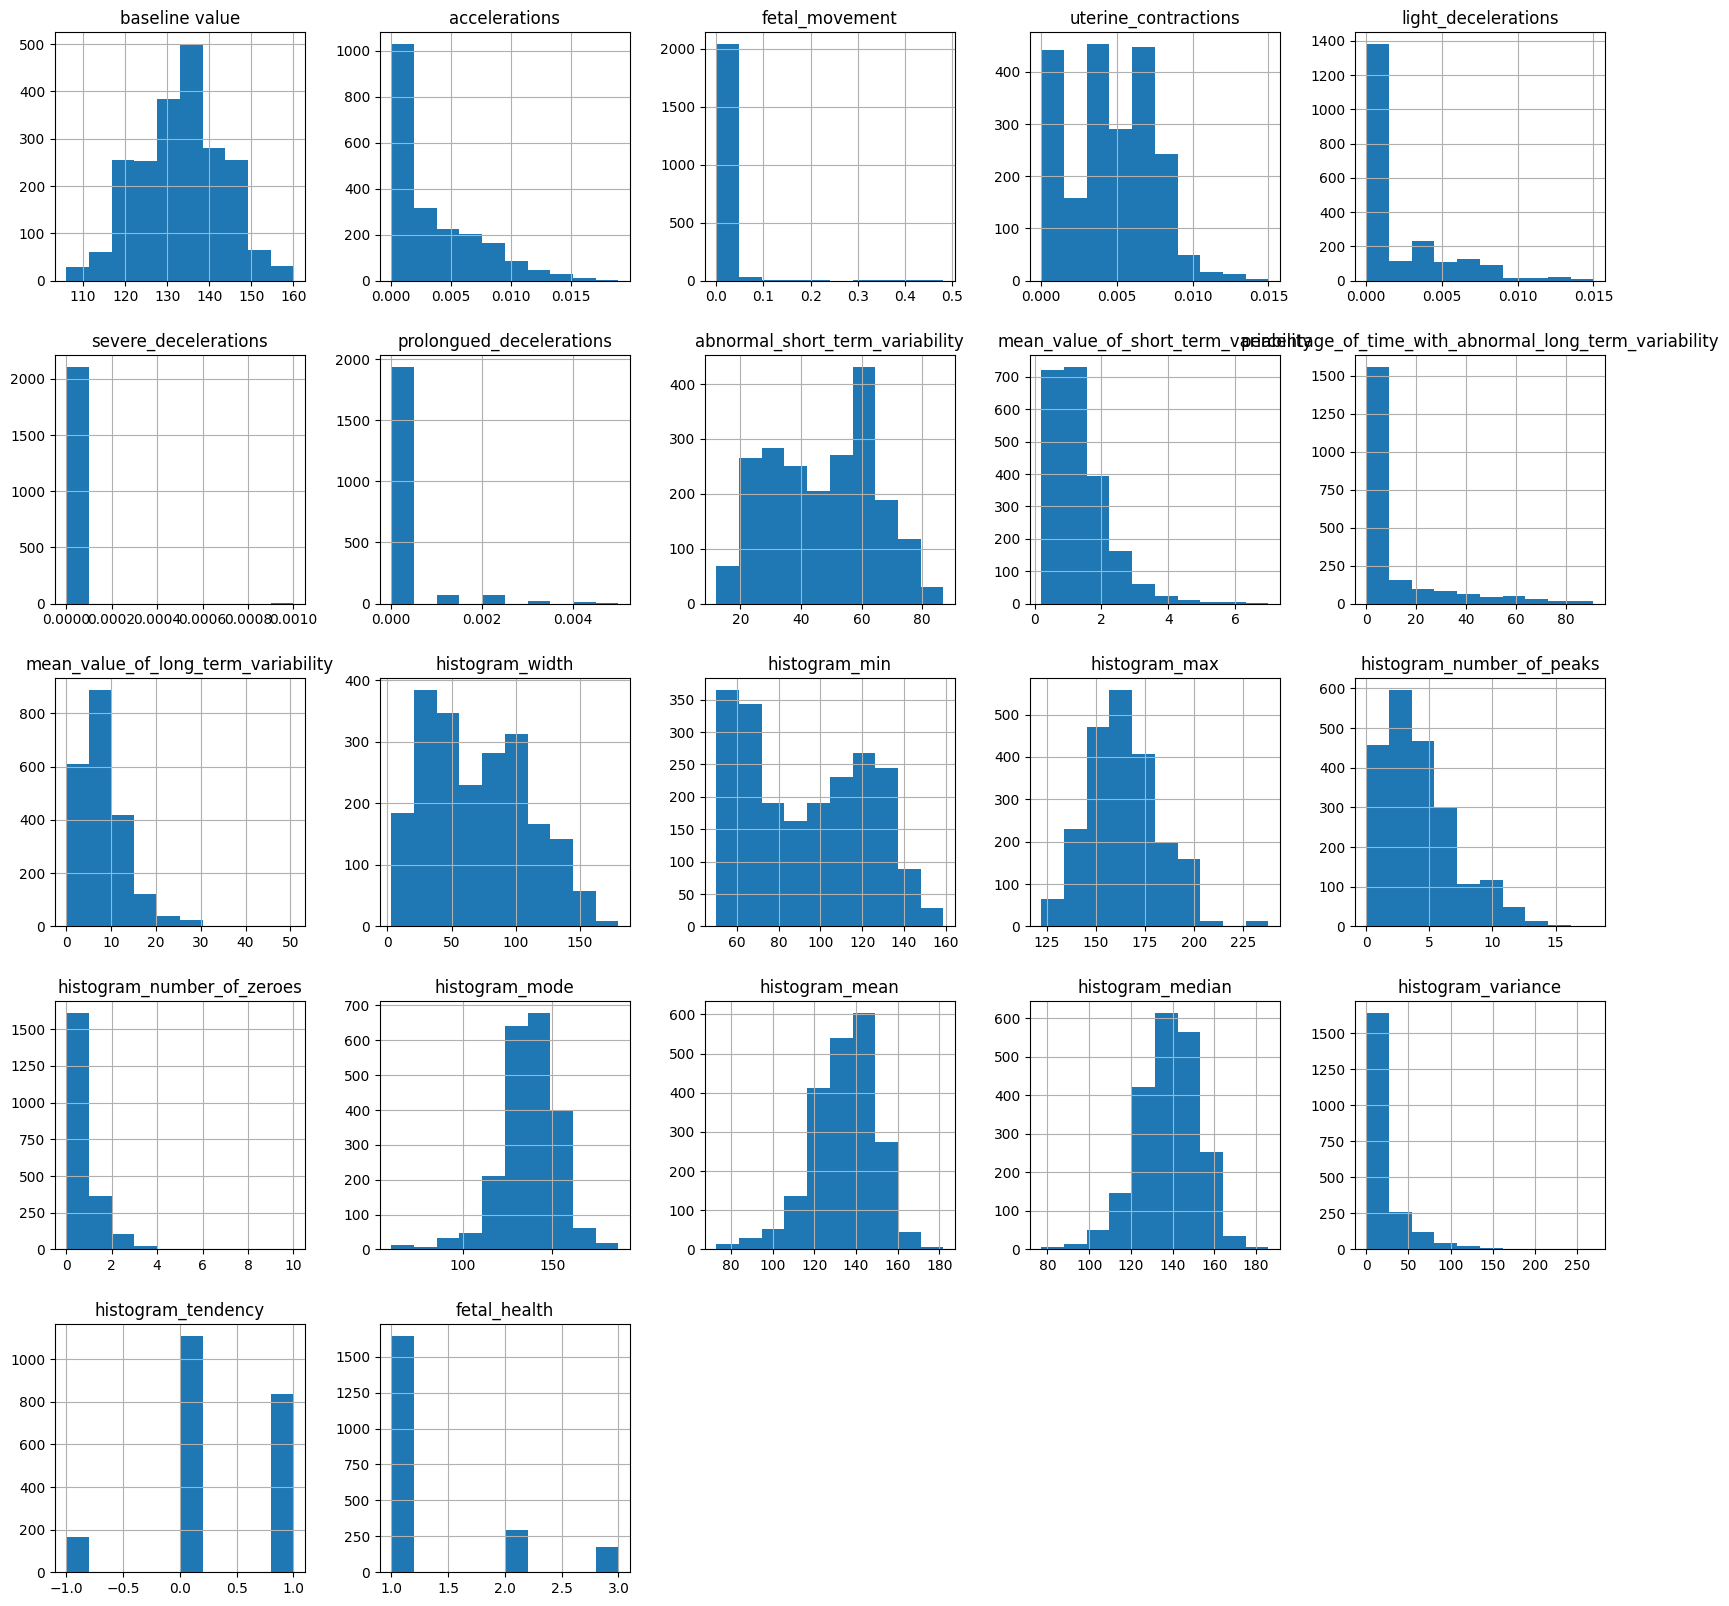

In [15]:
# Plotting the data distribution plots
p = data.hist(figsize=(20,20))

Text(0, 0.5, 'Count')

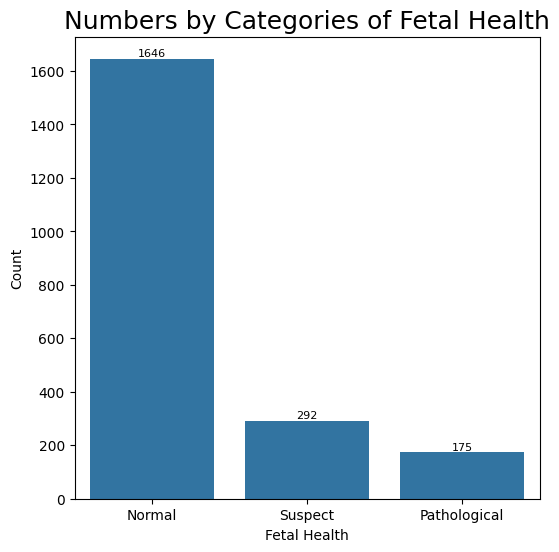

In [17]:
# Checking the balance of the data by plotting the count of outcomes by their values

plt.figure(figsize=(6,6))
fh_status = sns.countplot(x='fetal_health', data=data)


plt.title('Numbers by Categories of Fetal Health',
          fontsize=18
          )

for number, count in enumerate(data['fetal_health'].value_counts()):
    fh_status.text(number, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.xticks([0, 1, 2], ['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Fetal Health')
plt.ylabel('Count')

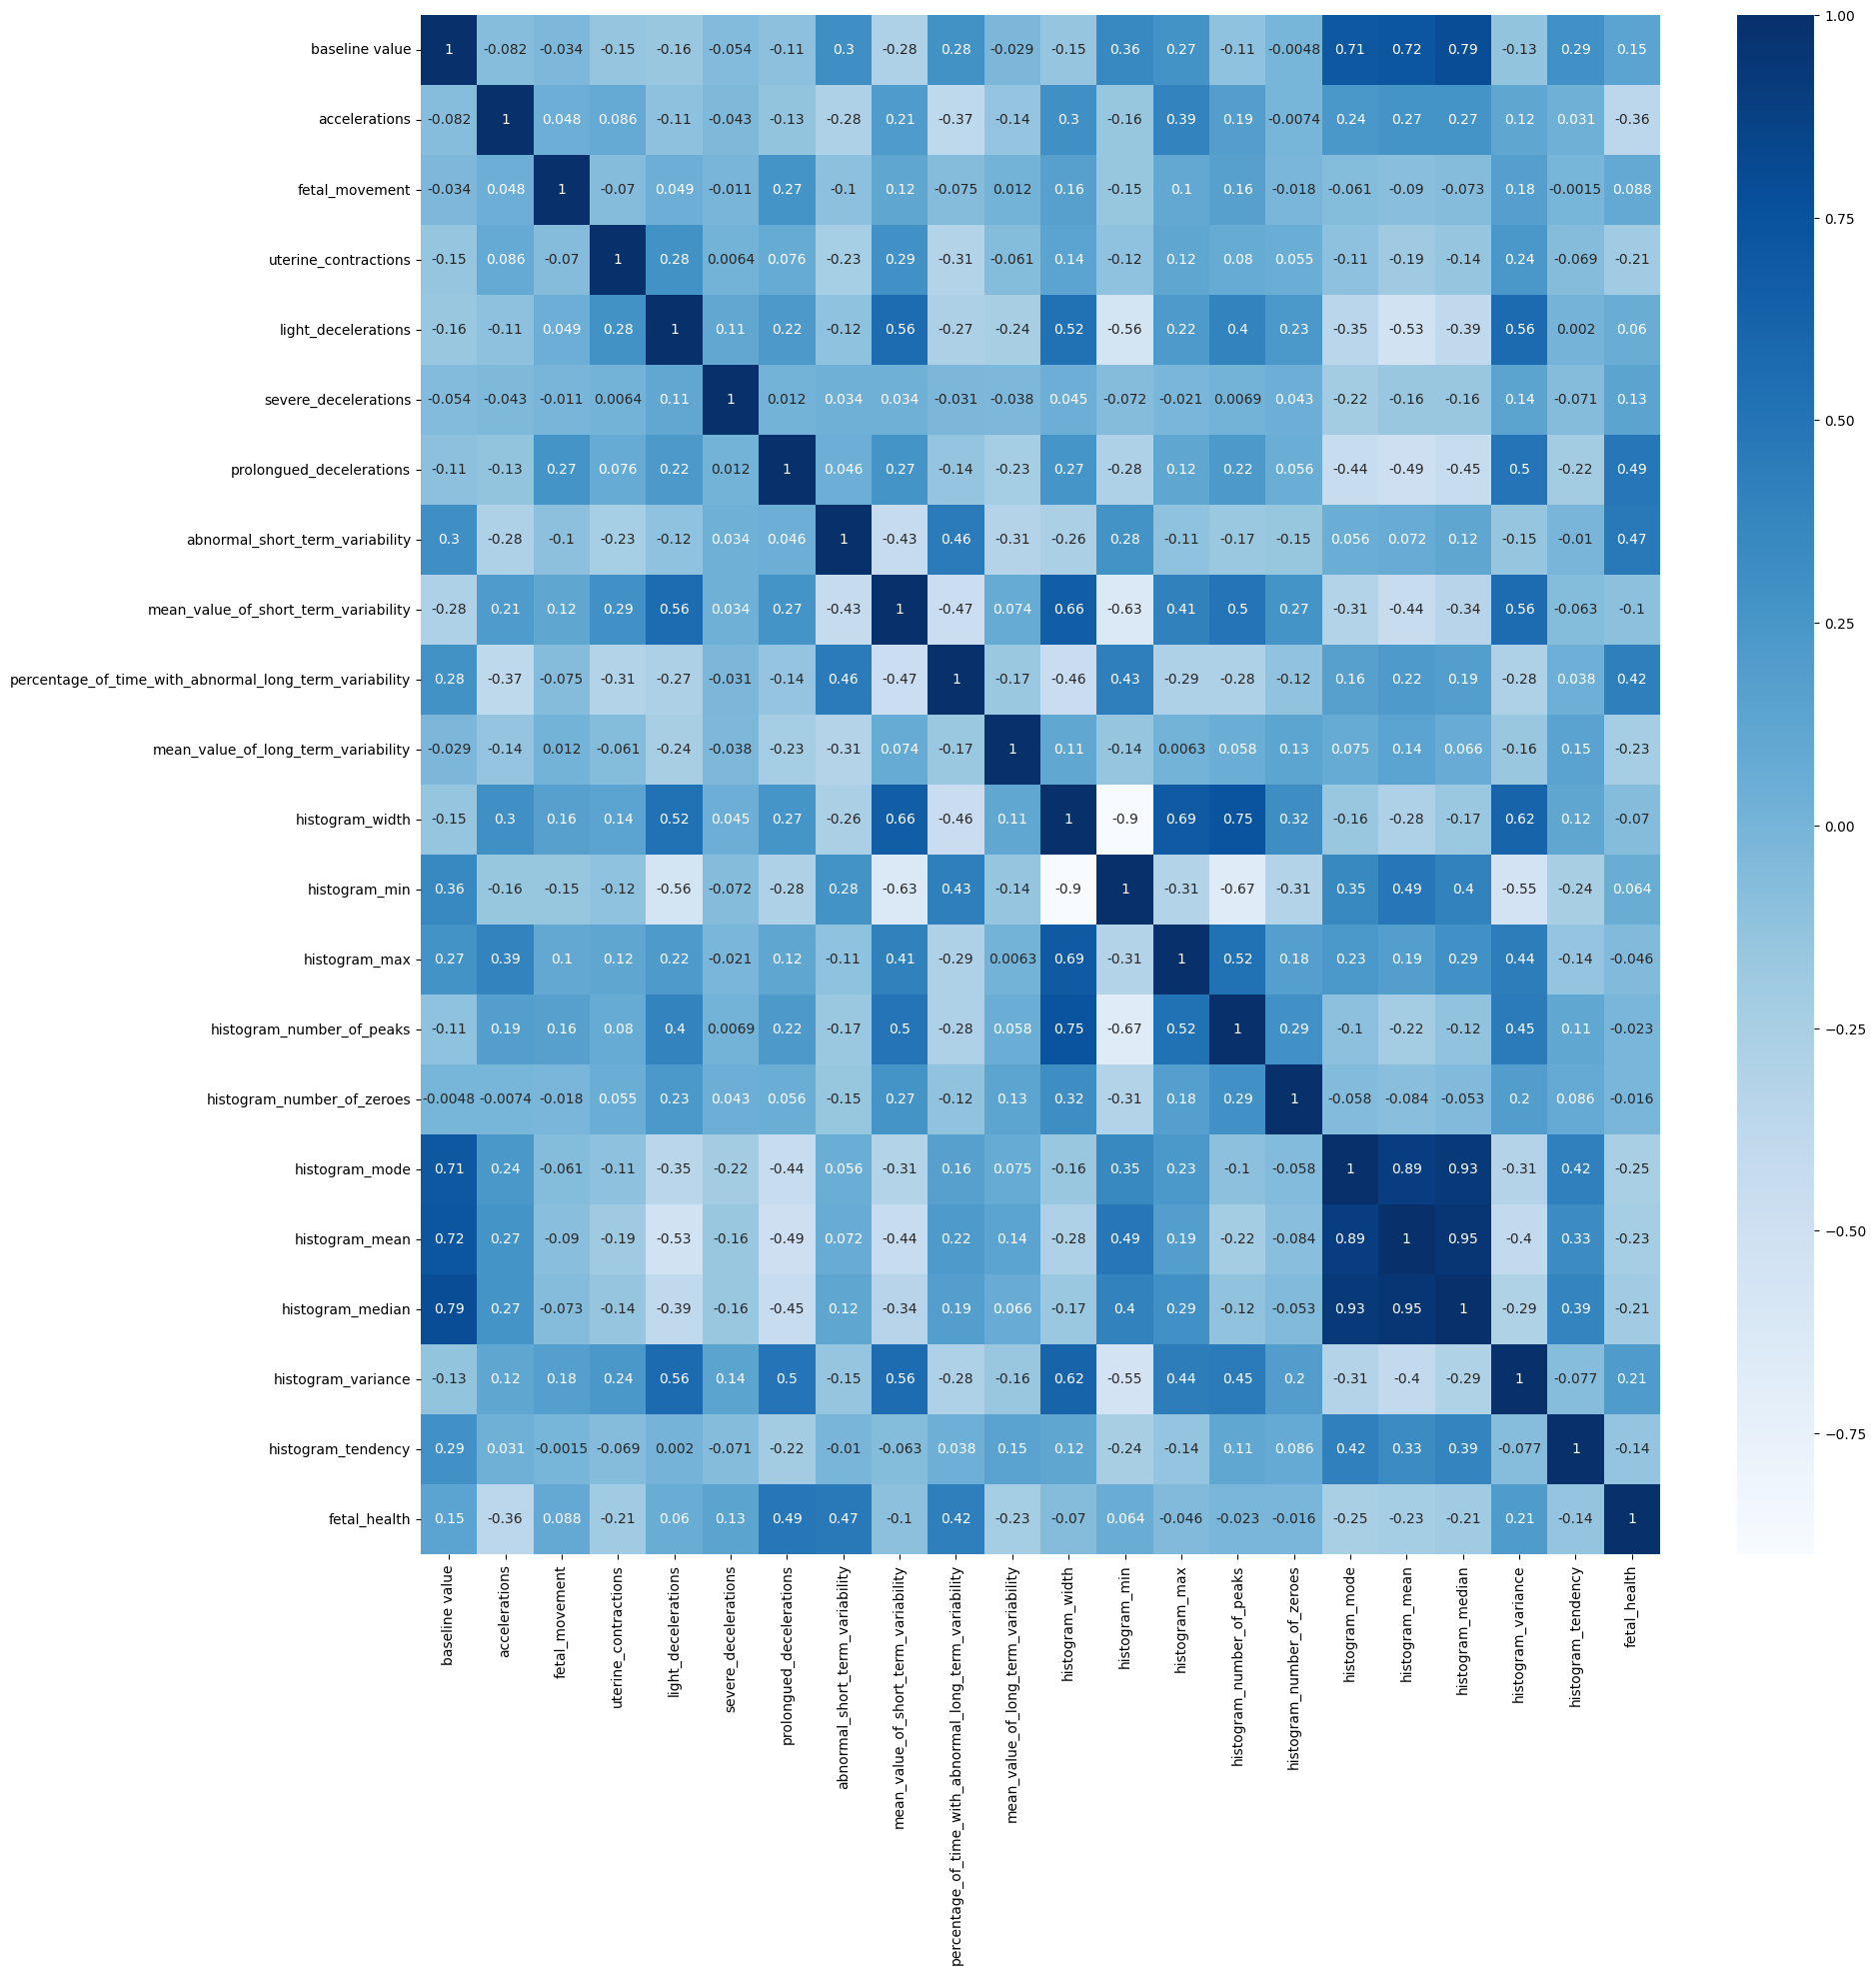

In [18]:
# Correlation between all the features
plt.figure(figsize=(20,20))
p = sns.heatmap(data.corr(),annot=True,cmap="Blues")

Text(0.5, 1.0, 'Correlation of Numerical Features with fetal_health')

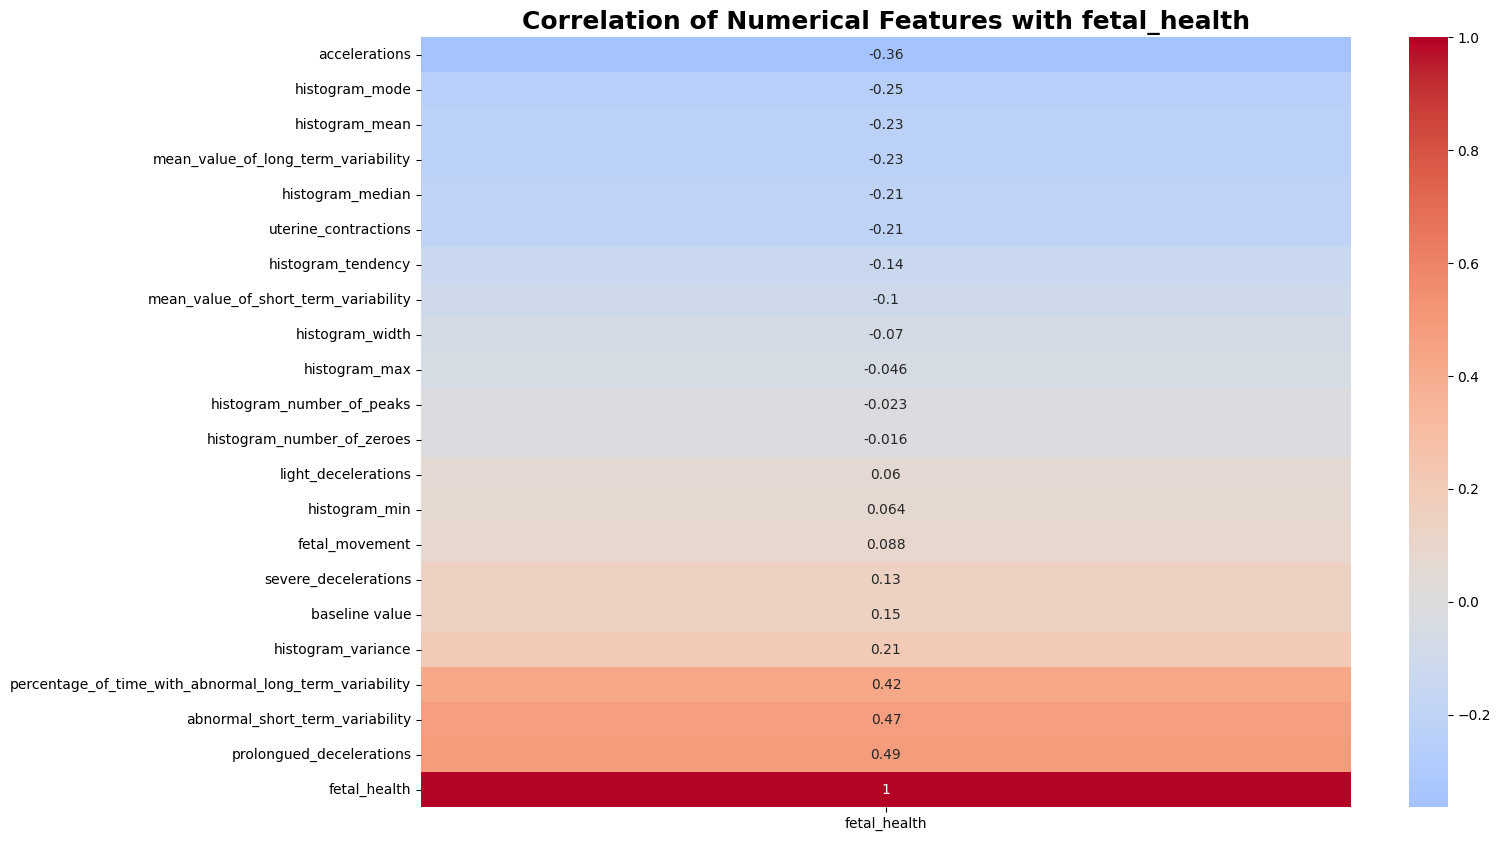

In [19]:
# Correlation of numerical features with fetal_health
correlation_matrix = data.corr()['fetal_health']

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True,cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with fetal_health",
                    fontsize=18,
                    fontweight="bold")

According to the analysis results, `prolonged decelerations`, `abnormal short-term variability`, and `percentage of time with abnormal long-term variability` exhibit a `highly positive correlation` with fetal health.

On the other hand, `accelerations`, `histogram mode` and `histogram mean` are `highly negatively correlated` with fetal health. These observations provide important guidance when evaluating the impact of specific traits on fetal health.



---



### **Data Processing**


In [20]:
# Feature selection with K-Best
X = data.drop(['fetal_health'], axis=1)
Y = data['fetal_health']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

SelectKBest uses statistical tests such as the chi-square test, ANOVA F test, or mutual information score to evaluate and rank features based on their correlation with the target variable. It then selects the top K features with the most important importance score to be included in the final feature subset.

In [21]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

                                              Feature       Score
6                            prolongued_decelerations  507.304309
7                     abnormal_short_term_variability  337.703020
9   percentage_of_time_with_abnormal_long_term_var...  335.386156
17                                     histogram_mean  298.759569
16                                     histogram_mode  276.382795
18                                   histogram_median  249.699523
1                                       accelerations  194.618345
19                                 histogram_variance  150.955827
0                                      baseline value  137.833999
8                mean_value_of_short_term_variability  118.050463
3                                uterine_contractions   93.647474
12                                      histogram_min   86.468440
10                mean_value_of_long_term_variability   69.418940
4                                 light_decelerations   66.750344
11        

<ipython-input-22-463a91509a63>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,


Text(0.5, 1.0, 'Feature Importance')

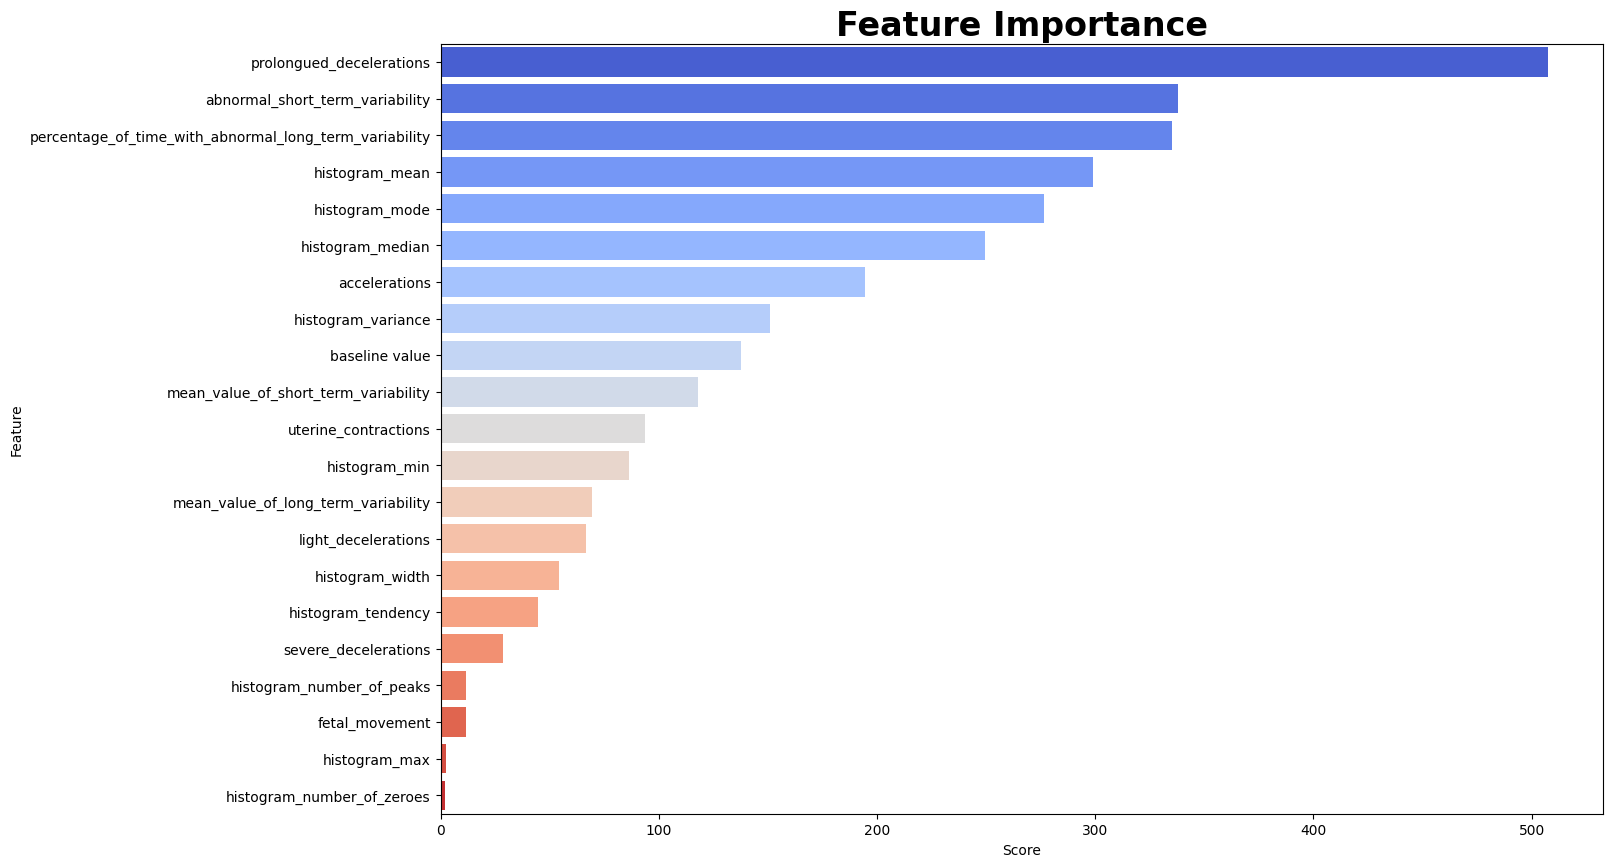

In [22]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(15, 10))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

In [23]:
# Finding the least correlated features with fetal health
low_score_features = featureScores[featureScores['Score'] < 15]
print(low_score_features)

                       Feature      Score
14   histogram_number_of_peaks  11.726828
2               fetal_movement  11.700712
13               histogram_max   2.523350
15  histogram_number_of_zeroes   2.134901


In [24]:
# Dropping the features that are below the threshold
features_to_drop = ['histogram_number_of_peaks', 'fetal_movement', 'histogram_max', 'histogram_number_of_zeroes']
data = data.drop(features_to_drop, axis=1)



---



# Feature Scaling (Standardization & Normalization)

Feature Scaling is a technique for standardizing individual features in data into a fixed range. It is performed to handle highly variable quantities or values or units.

If feature scaling is not done, a machine learning algorithm will tend to weigh larger values as higher values and treat smaller values as lower values, regardless of the unit of the values.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

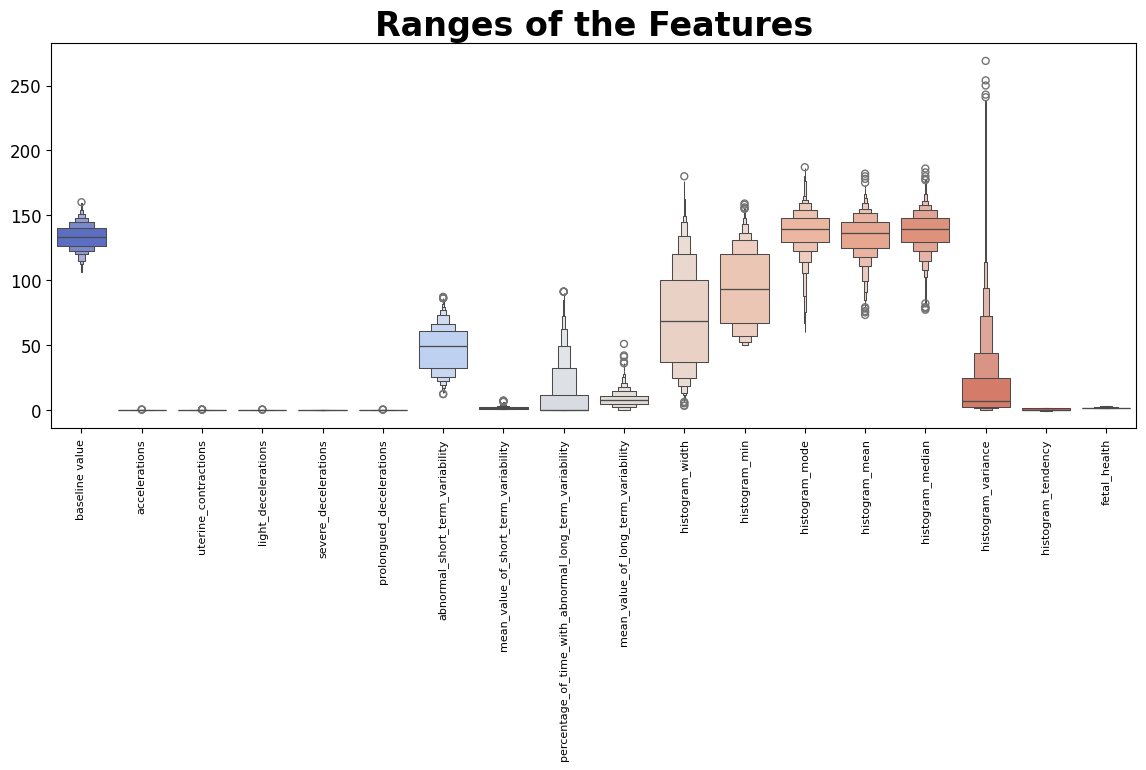

In [25]:
# Ranges of the features
plt.figure(figsize=(14, 5))
sns.boxenplot(data=data, palette='coolwarm')

plt.title('Ranges of the Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)

Value ranges of the features are very different and performing operations with these values will not lead to a healthy result. Therefore, features need to be scaled for a certain range.

In [26]:
# Splitting data into features (X) and outcomes (y)
X = data.drop(["fetal_health"], axis=1)
y = data["fetal_health"]

In [27]:
# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()

X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)

In [28]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,4.035264e-17,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504
mean_value_of_long_term_variability,2113.0,1.076070e-16,1.000237,-1.450150,-0.633328,-0.136131,0.467607,7.552654


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(0, -10.0, '−10'),
  Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

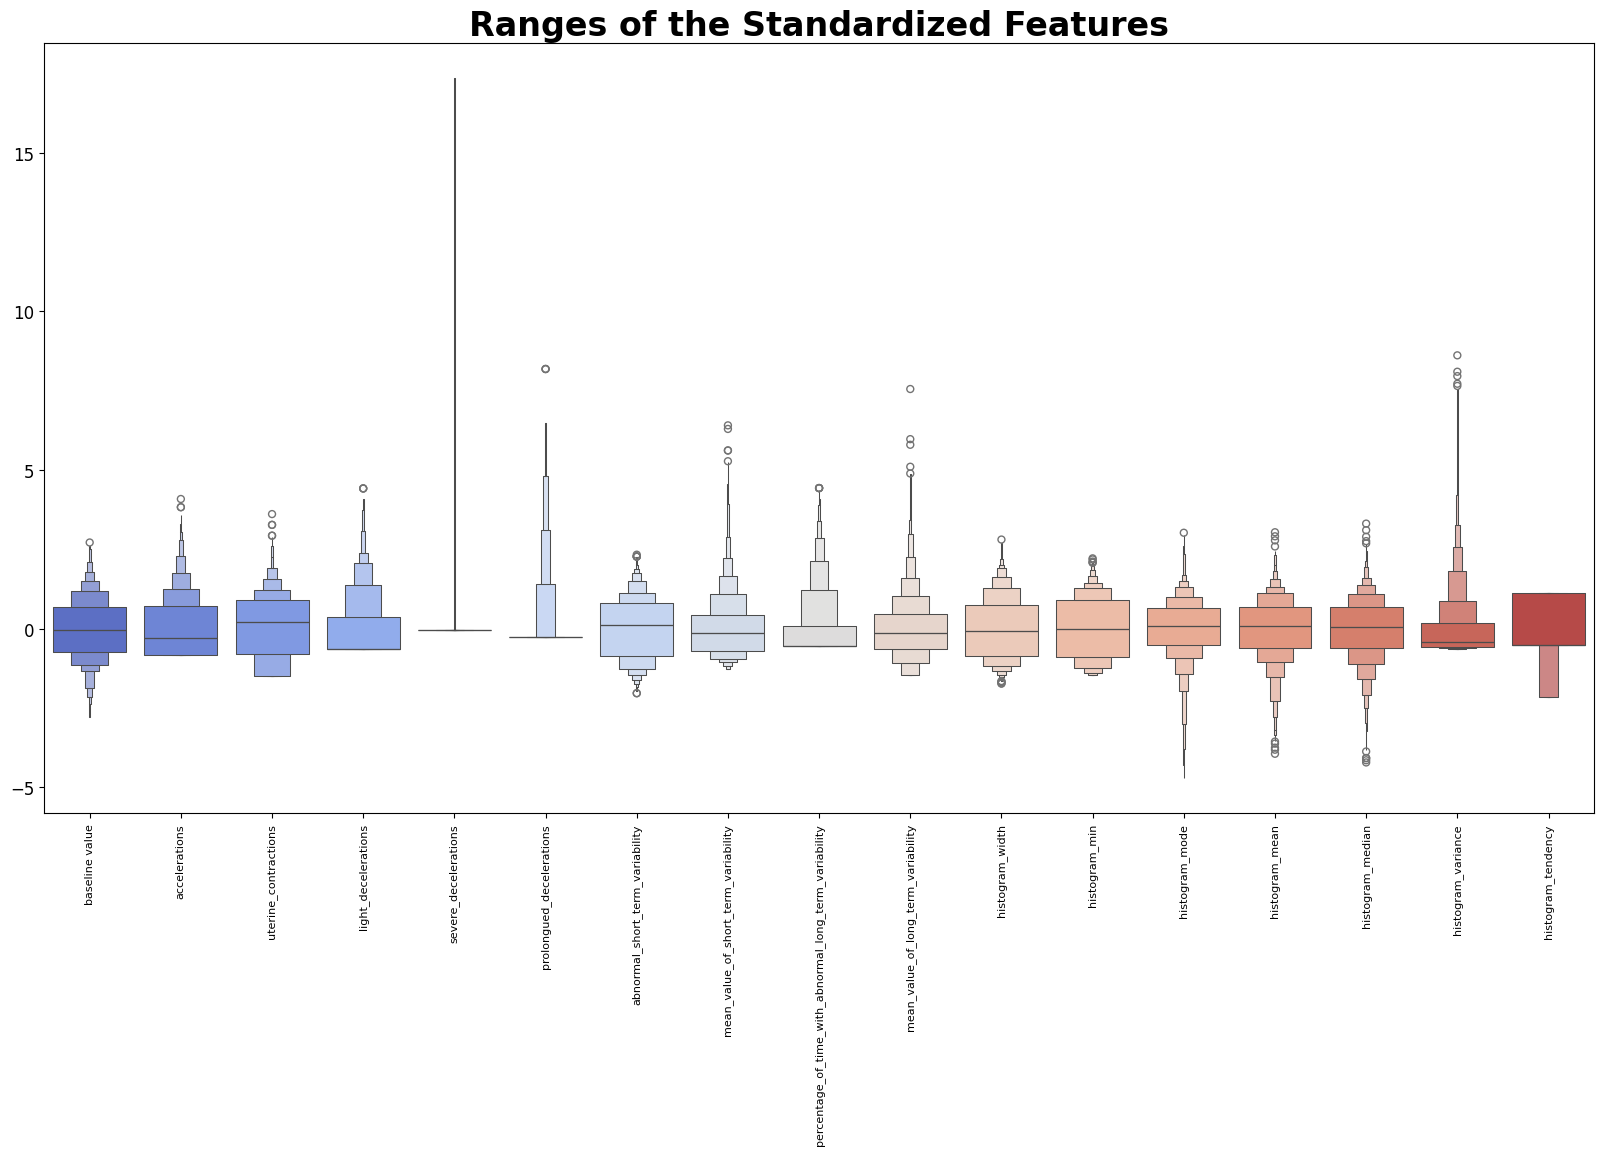

In [29]:
# Plot the standardized features
plt.figure(figsize=(20, 10))
sns.boxenplot(data=X_df, palette='coolwarm')

plt.title('Ranges of the Standardized Features',
          fontsize=24,
          fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)



---



### **Model Evaluation**

In [30]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 17), (423, 17), (1690,), (423,))

K-Fold Cross Validation

In [31]:
# Spot Check Algorithms
models = []

models.append(('NB',GaussianNB()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('LR',LogisticRegression()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('ID3 Estimator',Id3Estimator()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(("Ensemble",RandomForestClassifier()))

# Evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=6)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

NB : 0.724260 (0.045157)
LDA : 0.876331 (0.028922)
LR : 0.885799 (0.024972)
CART : 0.911243 (0.027627)
ID3 Estimator : 0.902959 (0.022640)
KNN : 0.895266 (0.023378)
SVM : 0.901183 (0.027886)
Ensemble : 0.932544 (0.015921)




---



# Naive Baye's Algorithm (Gaussian NB)

In [32]:
# Naive Baye's Algorithm
db = GaussianNB()
db.fit(X_train,y_train)

GaussianNB()

In [42]:
y1_pred = db.predict(X_test)
print("Accuracy Score of Naive Baye's : ",accuracy_score(y_test,y1_pred)*100)

Accuracy Score of Naive Baye's :  74.46808510638297


Text(0.5, 3.722222222222216, 'Predicted Label')

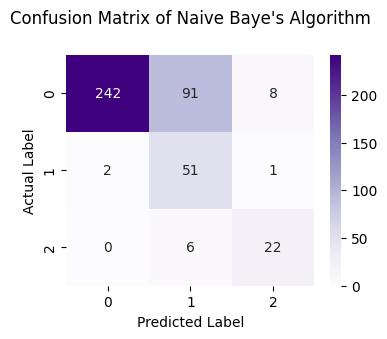

In [39]:
cnf_matrix = confusion_matrix(y_test,y1_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of Naive Baye's Algorithm",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [35]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

         1.0       0.99      0.71      0.83       341
         2.0       0.34      0.94      0.50        54
         3.0       0.71      0.79      0.75        28

    accuracy                           0.74       423
   macro avg       0.68      0.81      0.69       423
weighted avg       0.89      0.74      0.78       423





---



# Linear Discriminant Analysis

In [40]:
# Linear Discriminant Analysis Algorithm
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [41]:
y2_pred=lda.predict(X_test)
print("Accuracy Score of LDA : ",accuracy_score(y_test,y2_pred)*100)

Accuracy Score of LDA :  90.0709219858156


Text(0.5, 3.722222222222216, 'Predicted Label')

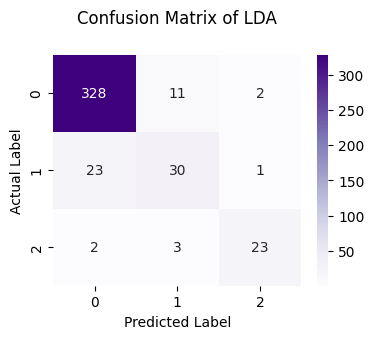

In [43]:
cnf_matrix = confusion_matrix(y_test,y2_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of LDA",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [44]:
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       341
         2.0       0.68      0.56      0.61        54
         3.0       0.88      0.82      0.85        28

    accuracy                           0.90       423
   macro avg       0.83      0.78      0.80       423
weighted avg       0.89      0.90      0.90       423





---



# Logistic Regression Algorithm


In [45]:
# Logistic Regression Algorithm
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [46]:
y3_pred=lr.predict(X_test)
print("Accuracy Score of LR: ",accuracy_score(y_test,y3_pred)*100)

Accuracy Score of LR:  90.78014184397163


Text(0.5, 3.722222222222216, 'Predicted Label')

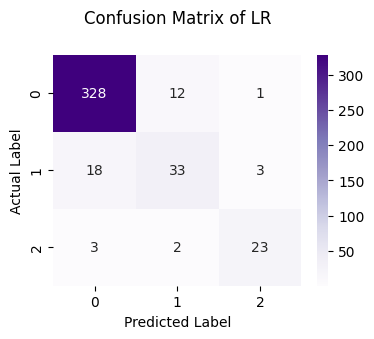

In [47]:
cnf_matrix = confusion_matrix(y_test,y3_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of LR",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [48]:
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       341
         2.0       0.70      0.61      0.65        54
         3.0       0.85      0.82      0.84        28

    accuracy                           0.91       423
   macro avg       0.83      0.80      0.81       423
weighted avg       0.90      0.91      0.91       423





---



# Decision Tree Classifier

In [49]:
# Initialize & train decision tree model
#from sklearn.tree import DecisionTreeClassifier,export_text

clf = DecisionTreeClassifier(criterion="entropy")   #Id3 algorithm uses entropy
clf.fit(X,y)

#Print the textual representation of the decision tree
tree_rules = export_text(clf,feature_names=list(X.columns))
print(tree_rules)

|--- abnormal_short_term_variability <= 59.50
|   |--- histogram_mean <= 107.50
|   |   |--- histogram_min <= 70.00
|   |   |   |--- abnormal_short_term_variability <= 24.50
|   |   |   |   |--- class: 2.0
|   |   |   |--- abnormal_short_term_variability >  24.50
|   |   |   |   |--- class: 3.0
|   |   |--- histogram_min >  70.00
|   |   |   |--- histogram_mean <= 98.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- histogram_mean >  98.00
|   |   |   |   |--- class: 1.0
|   |--- histogram_mean >  107.50
|   |   |--- accelerations <= 0.00
|   |   |   |--- histogram_median <= 150.50
|   |   |   |   |--- prolongued_decelerations <= 0.00
|   |   |   |   |   |--- histogram_mean <= 136.50
|   |   |   |   |   |   |--- histogram_variance <= 60.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- histogram_variance >  60.50
|   |   |   |   |   |   |   |--- uterine_contractions <= 0.01
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- uter

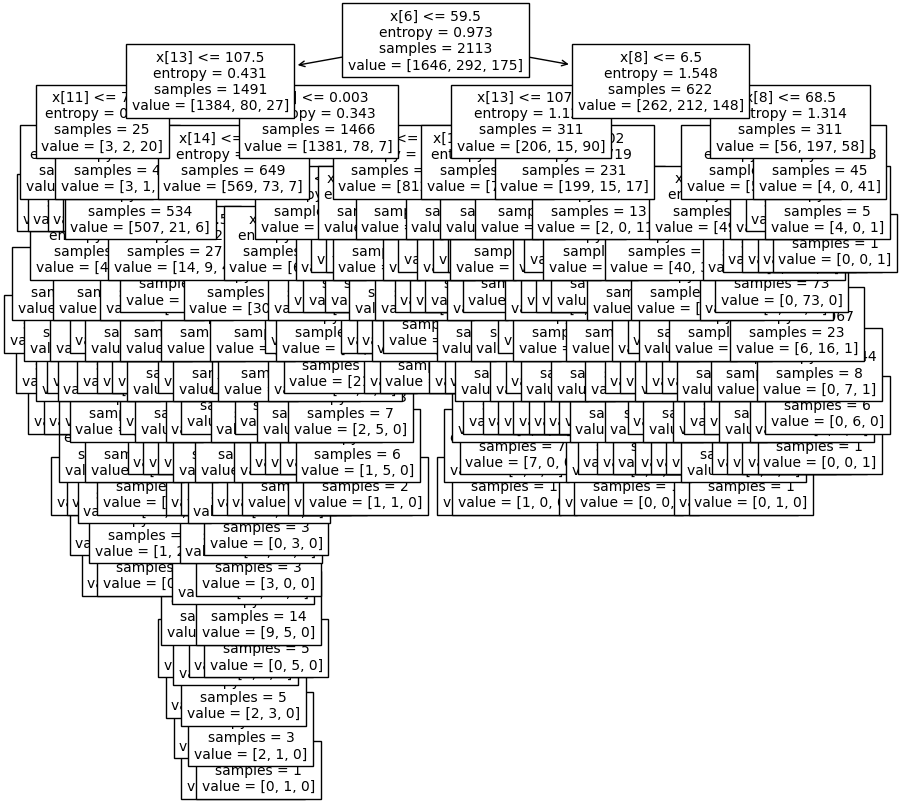

In [50]:
#Generate & print the textual representation of the decision tree
from sklearn import tree

fig,ax = plt.subplots(figsize=(10,10))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [51]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y4_pred=classifier.predict(X_test)
print("Accuracy Score of CART : ",accuracy_score(y_test,y4_pred)*100)

Accuracy Score of CART :  93.61702127659575


Text(0.5, 3.722222222222216, 'Predicted Label')

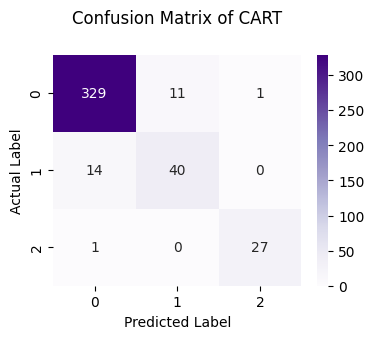

In [53]:
cnf_matrix = confusion_matrix(y_test,y4_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of CART",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [54]:
print(classification_report(y_test,y4_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       341
         2.0       0.78      0.74      0.76        54
         3.0       0.96      0.96      0.96        28

    accuracy                           0.94       423
   macro avg       0.90      0.89      0.90       423
weighted avg       0.93      0.94      0.94       423





---



# ID3 Estimator

In [55]:
from sklearn.tree import export_graphviz
from id3 import Id3Estimator,export_text
import graphviz

#Export the decision tree as a DOT file
dot_data = export_graphviz(clf,feature_names=list(X.columns),filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

# Save the graph as a png file or display it
graph.render("decision_tree",format='png',cleanup=True)

'decision_tree.png'

In [58]:
#create object estimator
estimator = Id3Estimator()
# fit the training data into the object and train the model
estimator.fit(X_train,y_train)
#test the estimator using independent features and get the predicted values
y5_pred = estimator.predict(X_test)
#print the accuracy score of the actual and predicted values
print("Accuracy Score of ID3 : ",accuracy_score(y_test,y5_pred)*100)

Accuracy Score of ID3 :  94.56264775413712


Text(0.5, 3.722222222222216, 'Predicted Label')

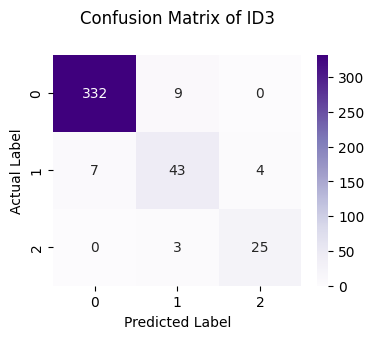

In [59]:
cnf_matrix = confusion_matrix(y_test,y5_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of ID3",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [60]:
print(classification_report(y_test,y5_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98       341
         2.0       0.78      0.80      0.79        54
         3.0       0.86      0.89      0.88        28

    accuracy                           0.95       423
   macro avg       0.87      0.89      0.88       423
weighted avg       0.95      0.95      0.95       423





---



# KNN Algorithm

In [61]:
test_scores=[]
train_scores=[]

for i in range(1,15):
  knn=KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [62]:
train_scores

[0.9994082840236687,
 0.9508875739644971,
 0.9508875739644971,
 0.936094674556213,
 0.936094674556213,
 0.921301775147929,
 0.919526627218935,
 0.914792899408284,
 0.9177514792899408,
 0.9100591715976332,
 0.9071005917159763,
 0.9041420118343195,
 0.9047337278106509,
 0.901775147928994]

In [63]:
test_scores

[0.91725768321513,
 0.9290780141843972,
 0.9125295508274232,
 0.9219858156028369,
 0.9267139479905437,
 0.91725768321513,
 0.9196217494089834,
 0.91725768321513,
 0.9148936170212766,
 0.91725768321513,
 0.9196217494089834,
 0.9148936170212766,
 0.9148936170212766,
 0.91725768321513]

In [64]:
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_score]
print("Max train score = ",max_train_score*100," and k = ",list(map(lambda x:x+1,train_scores_ind)))

Max train score =  99.94082840236686  and k =  [1]


In [65]:
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_score]
print("Max test score = ",max_test_score*100," and k = ",list(map(lambda x:x+1,test_scores_ind)))

Max test score =  92.90780141843972  and k =  [2]


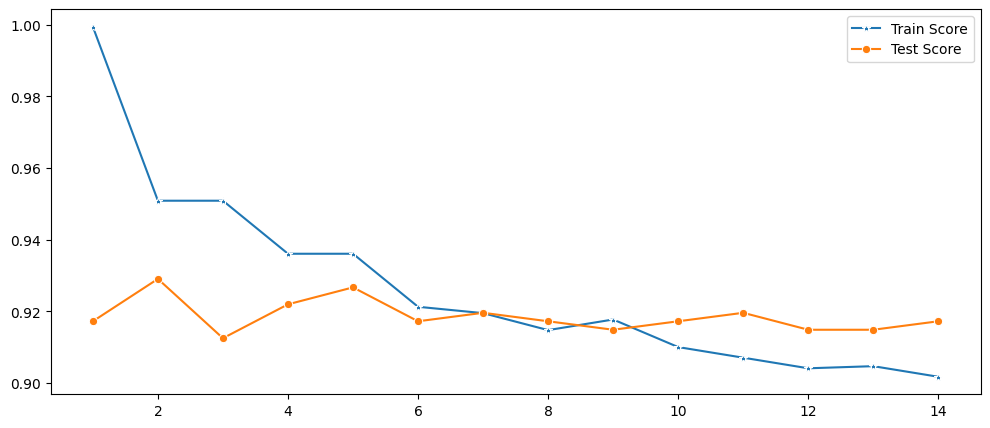

In [66]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15), y=test_scores,marker='o',label='Test Score')
plt.show()

The best result is captured at k=2 , hence k=2 is used for the final model

In [67]:
knn = KNeighborsClassifier(2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [69]:
y6_pred = knn.predict(X_test)
print("Accuracy Score of KNN : ",accuracy_score(y_test,y6_pred)*100)

Accuracy Score of KNN :  92.90780141843972


Text(0.5, 3.722222222222216, 'Predicted Label')

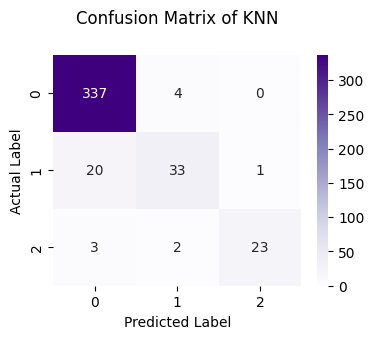

In [70]:
cnf_matrix = confusion_matrix(y_test,y6_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of KNN",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [71]:
print(classification_report(y_test,y6_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       341
         2.0       0.85      0.61      0.71        54
         3.0       0.96      0.82      0.88        28

    accuracy                           0.93       423
   macro avg       0.91      0.81      0.85       423
weighted avg       0.93      0.93      0.92       423





---



# Support Vector Classifier (SVC)

In [72]:
# Support Vector Classifier
svc = SVC()

In [73]:
# Parameter tuning with GridSearchCV
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid_svc, cv=10)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [74]:
# Best parameters for SVC
best_params_for_svc = grid_search_svc.best_params_
print(best_params_for_svc)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [75]:
# Fitting SVC with the best parameters
svc_classifier = SVC(**best_params_for_svc, random_state=42)
svc_classifier.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [76]:
# Prediction and accuracy
y7_pred = svc_classifier.predict(X_test)
print("Accuracy Score of SVC : ",accuracy_score(y_test, y7_pred) * 100)

Accuracy Score of SVC :  95.50827423167848


Text(0.5, 3.722222222222216, 'Predicted Label')

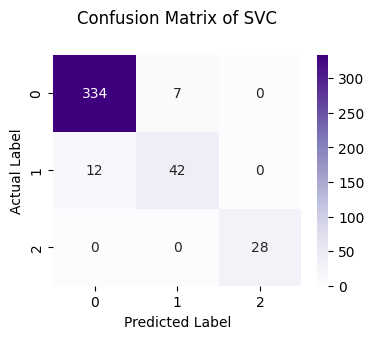

In [77]:
cnf_matrix = confusion_matrix(y_test,y7_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of SVC",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [78]:
print(classification_report(y_test,y7_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       341
         2.0       0.86      0.78      0.82        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.94      0.92      0.93       423
weighted avg       0.95      0.96      0.95       423





---



# Random Forest Classifier

In [88]:
# Random Forest Classification
rf = RandomForestClassifier()

In [89]:
# Parameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [90]:
# Best parameters for Random Forest
best_params_for_rf = grid_search_rf.best_params_
print(best_params_for_rf)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [91]:
# Fitting Random Forest with the best parameters
model = RandomForestClassifier(**best_params_for_rf, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [93]:
# Prediction and accuracy
y8_pred = model.predict(X_test)
print("Accuracy Score of Ensemble : ",accuracy_score(y_test, y8_pred) * 100)

Accuracy Score of Ensemble :  96.45390070921985


Text(0.5, 3.722222222222216, 'Predicted Label')

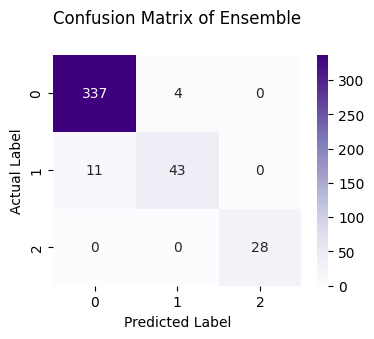

In [95]:
cnf_matrix = confusion_matrix(y_test,y8_pred)
plt.figure(figsize=(4,3))
p = sns.heatmap((cnf_matrix),annot=True,cmap="Purples",fmt='g')
plt.title("Confusion Matrix of Ensemble",y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [94]:
# Random Forest Classification report (precision, recall, f1-score, support, accuracy)
print(classification_report(y_test, y8_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.91      0.80      0.85        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.96       423
   macro avg       0.96      0.93      0.94       423
weighted avg       0.96      0.96      0.96       423





---



In [99]:
# Training, test scores and margin of error of the models
pd.DataFrame({
    'Model': ['NB','LDA','LR','CART','KNN', 'SVC','Random Forest'],
    'Training Score': [db.score(X_train, y_train),lda.score(X_train, y_train),lr.score(X_train, y_train),clf.score(X_train, y_train),knn.score(X_train, y_train), svc_classifier.score(X_train, y_train), model.score(X_train, y_train)],
    'Test Score': [accuracy_score(y_test, y1_pred),accuracy_score(y_test, y2_pred),accuracy_score(y_test, y3_pred),accuracy_score(y_test, y4_pred),accuracy_score(y_test, y6_pred), accuracy_score(y_test, y7_pred), accuracy_score(y_test, y8_pred)],
    'Error': [db.score(X_train, y_train) - accuracy_score(y_test, y1_pred),lda.score(X_train, y_train) - accuracy_score(y_test, y2_pred),lr.score(X_train, y_train) - accuracy_score(y_test, y3_pred),clf.score(X_train, y_train) - accuracy_score(y_test, y4_pred),knn.score(X_train, y_train) - accuracy_score(y_test, y6_pred), svc_classifier.score(X_train, y_train) - accuracy_score(y_test,y7_pred), model.score(X_train, y_train) - accuracy_score(y_test, y8_pred)]
})

,Model,Training Score,Test Score,Error
0,NB,0.720118,0.744681,-0.024563
1,LDA,0.878107,0.900709,-0.022603
2,LR,0.895266,0.907801,-0.012535
3,CART,0.140828,0.936170,-0.795342
4,KNN,0.950888,0.929078,0.021810
5,SVC,0.958580,0.955083,0.003497
6,Random Forest,0.999408,0.964539,0.034869




---



### **Conclusion**

When the training scores, test scores and error margins of the trained models are compared, it is seen that `Random Forest` is the model that gives the best results in sectors such as healthcare, where high accuracy is important, with a training score of 0.999408, a test score of 0.964539 and an error margin of 0.034869. On the other hand, the lowest success rate appears to belong to the K-Nearest Neighbors model among the positive error rates.
